In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# carga del dataset (ruta relativa) con codificación correcta
data = pd.read_csv(r'DATASETS - HeatMap & BoxPlots\Facebook_Marketplace_data.csv', encoding='ISO-8859-1')

data.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7050 entries, 0 to 7049
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   status_id         7050 non-null   int64 
 1   status_type       7050 non-null   object
 2   status_published  7050 non-null   object
 3   num_reactions     7050 non-null   int64 
 4   num_comments      7050 non-null   int64 
 5   num_shares        7050 non-null   int64 
 6   num_likes         7050 non-null   int64 
 7   num_loves         7050 non-null   int64 
 8   num_wows          7050 non-null   int64 
 9   num_hahas         7050 non-null   int64 
 10  num_sads          7050 non-null   int64 
 11  num_angrys        7050 non-null   int64 
dtypes: int64(10), object(2)
memory usage: 661.1+ KB


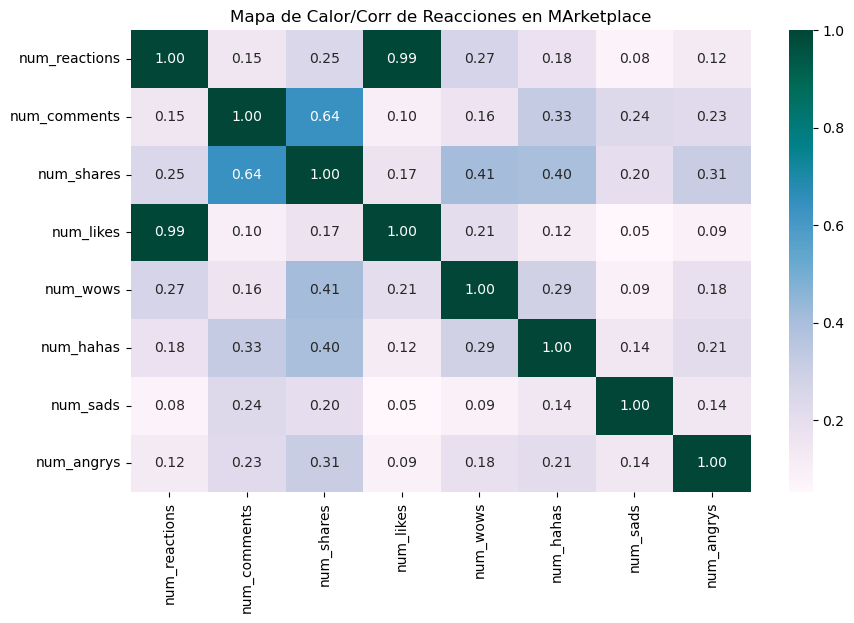

In [3]:
cols = ['num_reactions', 'num_comments', 'num_shares', 'num_likes', 'num_wows', 'num_hahas', 'num_sads', 'num_angrys']
corr = data[cols].corr()

plt.figure(figsize=(10, 6))
sns.heatmap(corr, annot=True, fmt=".2f", cmap='PuBuGn')
plt.title('Mapa de Calor/Corr de Reacciones en MArketplace')
plt.show()

#La interpretación del mapa de calor nos lleva a conclusiones sumamente interesantes, como el hecho
#de que la cantidad de veces que se comparte una publicación (num_shares) tiene una correlación
#alta y significativa con la cantidad de comentarios (num_comments) y reacciones (num_reactions)
#Otro insight interesante es que la la cantidad de likes (num_likes) tiene una correlación
#muy alta con la cantidad total de reacciones (num_reactions), lo que es evidente ya que un like
#se considera como una forma de reacción.
#curiosamente y también de manera evidente,las reacciones negativas (num_sads y num_angrys)
# tienen una baja correlación con el numero de likes (num_likes)
#el numero de reacciones de risa (num_hahas) tiene una correlación moderada con el numero de 
# veces que se comparte una publicación (num_shares), lo que significa que las publicaciones 
# consideradas graciosas suelen compartirse a menudo.


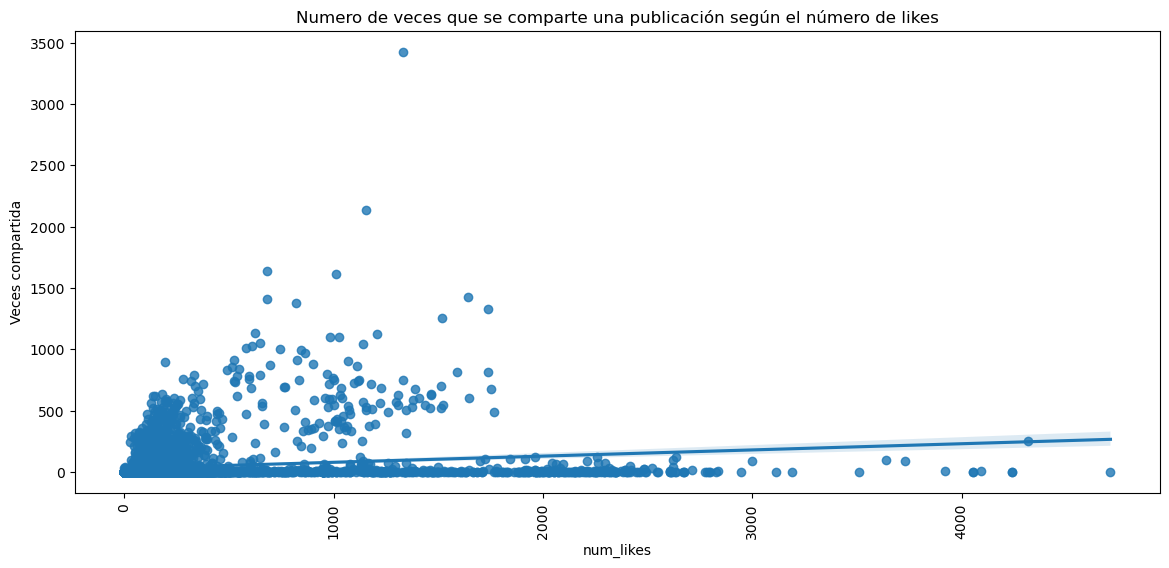

In [14]:
plt.figure(figsize=(14,6))
sns.regplot(data=data, x="num_likes", y="num_shares")
plt.title("Numero de veces que se comparte una publicación según el número de likes")
plt.xticks(rotation=90)
plt.ylabel("Veces compartida")
plt.show()
#Como podemos ver, la cantidad de likes en una publicación no necesariamente se traduce en
#una mayor cantidad de veces compartida. Hay publicaciones que tienen muchos likes y sin embargo,
#no se comparten tanto. Esto quiere decir que hay más factores en juego.


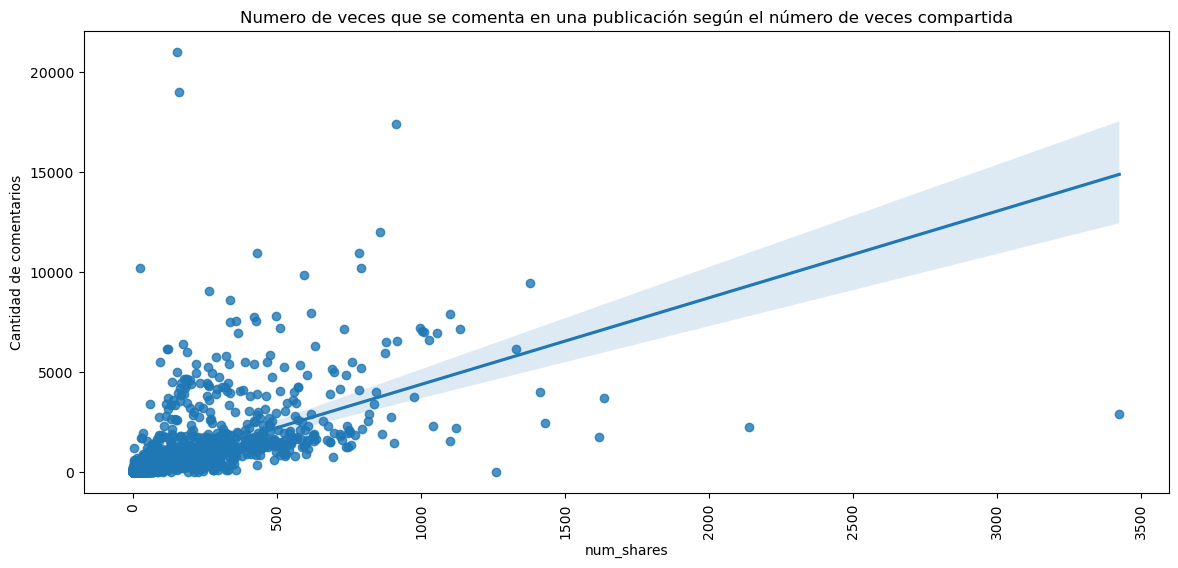

In [13]:
plt.figure(figsize=(14,6))
sns.regplot(data=data, x="num_shares", y="num_comments")
plt.title("Numero de veces que se comenta en una publicación según el número de veces compartida")
plt.xticks(rotation=90)
plt.ylabel("Cantidad de comentarios")
plt.show()
# Aqui si podemos notar una relación mas clara que en el anterior gráifco, que quiere decir
#que a mayor numero de veces que se comparte una publicación, mayor es el número de comentarios que
# recibe la misma. Esto puede ser debido a que hay personas que se etiquetan en publicaciones y 
# las envian a sus amigos, generando interacciones en los comentarios en la publicación.

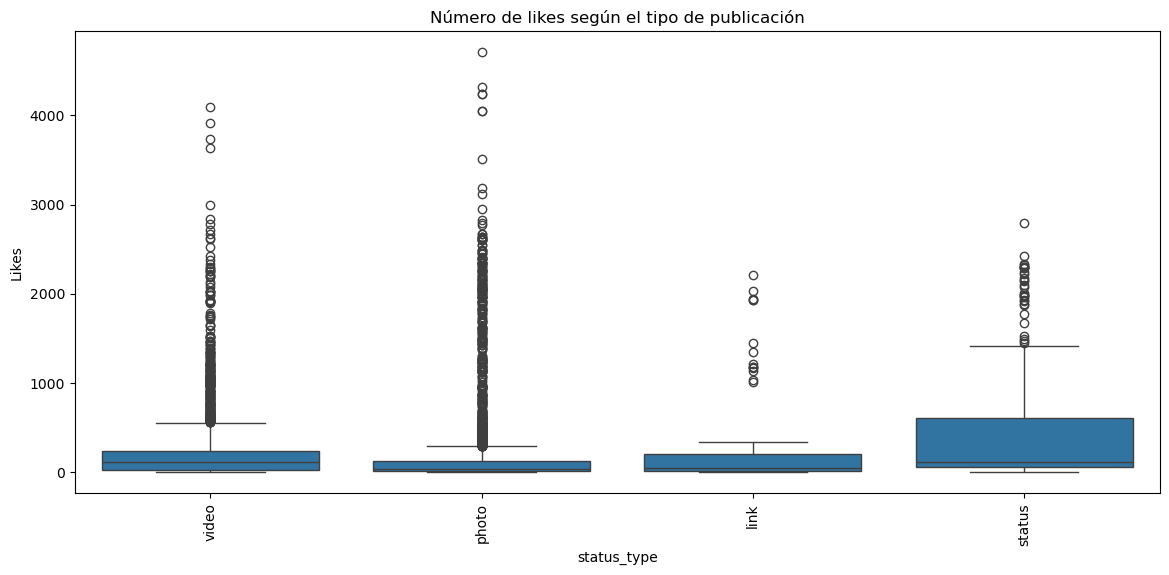

In [ ]:
plt.figure(figsize=(14,6))
sns.boxplot(data=data, x="status_type", y="num_likes")
plt.title("Número de likes según el tipo de publicación")
plt.xticks(rotation=90)
plt.ylabel("Likes")
plt.show()
#creo que este gráfico demuestra de una forma sumamente clara el fenomeno de las publicaciones virales#
# en el internet, ya que en cada tipo de publicación se encuentran una enorme cantidad de#
#outliers que representan aquellas publicaciones que se volvieron virales y recibieron una enorme#
#cantidad de likes en comparación a la mediana.

In [ ]:
# 🔄 Resumen dinámico de la matriz de correlación (usando data y cols existentes)

# Calcular matriz de correlación solo con las columnas relevantes
corr = data[cols].corr()

# Obtener pares únicos (triángulo superior sin diagonal)
pares = []
for i in range(len(cols)):
    for j in range(i + 1, len(cols)):
        a, b = cols[i], cols[j]
        pares.append((a, b, corr.iloc[i, j]))

# Ordenar por magnitud absoluta de la correlación
pares_ord = sorted(pares, key=lambda x: abs(x[2]), reverse=True)

# Clasificar niveles de correlación
niveles = {
    'muy fuerte (|r| >= 0.7)': [],
    'fuerte (0.5 <= |r| < 0.7)': [],
    'moderada (0.3 <= |r| < 0.5)': [],
    'débil (0.1 <= |r| < 0.3)': [],
    'casi nula (|r| < 0.1)': []
}

for a, b, r in pares:
    ar = abs(r)
    if ar >= 0.7:
        niveles['muy fuerte (|r| >= 0.7)'].append((a, b, r))
    elif ar >= 0.5:
        niveles['fuerte (0.5 <= |r| < 0.7)'].append((a, b, r))
    elif ar >= 0.3:
        niveles['moderada (0.3 <= |r| < 0.5)'].append((a, b, r))
    elif ar >= 0.1:
        niveles['débil (0.1 <= |r| < 0.3)'].append((a, b, r))
    else:
        niveles['casi nula (|r| < 0.1)'].append((a, b, r))

# Mejor asociación por variable
mejor_por_var = {}
for v in cols:
    mejores = [(a if b == v else b, r) for a, b, r in pares if a == v or b == v]
    if mejores:
        mejor_por_var[v] = sorted(mejores, key=lambda x: abs(x[1]), reverse=True)[0]

# === RESULTADOS ===
print('=== PARES ORDENADOS POR |r| (top 5) ===')
for a, b, r in pares_ord[:5]:
    signo = 'positiva' if r > 0 else 'negativa'
    print(f' - {a} vs {b}: r={r:.2f} ({signo})')

print('\n=== DISTRIBUCIÓN POR NIVELES ===')
for nivel, lista in niveles.items():
    print(f' {nivel}: {len(lista)} pares')

print('\n=== MEJOR ASOCIACIÓN POR VARIABLE ===')
for var, (otro, r) in mejor_por_var.items():
    signo = 'positiva' if r > 0 else 'negativa'
    print(f' - {var} con {otro}: r={r:.2f} ({signo})')

# Tabla resumen opcional
res_df = pd.DataFrame(pares_ord, columns=['var_a', 'var_b', 'r'])
res_df.head()


#podemos encontrar una fuerte conrrelacion entre las reacciones y los 
# likes (0.99) esto indica que prácticamente crecen a la par
#También hay una correlación ligera entre la cantidad de comentarios y veces que se comparte 
# (0.64) queriendo decir que las publicaciones muy compartidas generan mas comentarios
#Las otras asociaciones muestran correlaciones muy ligeras o bajas, osea que hay menor efecto entre si
#Como un conjunto todas las variables están moderadamente relacionadas

=== PARES ORDENADOS POR |r| (top 5) ===
 - num_reactions vs num_likes: r=0.99 (positiva)
 - num_comments vs num_shares: r=0.64 (positiva)
 - num_shares vs num_wows: r=0.41 (positiva)
 - num_shares vs num_hahas: r=0.40 (positiva)
 - num_comments vs num_hahas: r=0.33 (positiva)

=== DISTRIBUCIÓN POR NIVELES ===
 muy fuerte (|r| >= 0.7): 1 pares
 fuerte (0.5 <= |r| < 0.7): 1 pares
 moderada (0.3 <= |r| < 0.5): 4 pares
 débil (0.1 <= |r| < 0.3): 18 pares
 casi nula (|r| < 0.1): 4 pares

=== MEJOR ASOCIACIÓN POR VARIABLE ===
 - num_reactions con num_likes: r=0.99 (positiva)
 - num_comments con num_shares: r=0.64 (positiva)
 - num_shares con num_comments: r=0.64 (positiva)
 - num_likes con num_reactions: r=0.99 (positiva)
 - num_wows con num_shares: r=0.41 (positiva)
 - num_hahas con num_shares: r=0.40 (positiva)
 - num_sads con num_comments: r=0.24 (positiva)
 - num_angrys con num_shares: r=0.31 (positiva)


,var_a,var_b,r
0,num_reactions,num_likes,0.994923
1,num_comments,num_shares,0.640637
2,num_shares,num_wows,0.407628
3,num_shares,num_hahas,0.399826
4,num_comments,num_hahas,0.325048
